In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from google.colab import drive
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_path = '/content/drive/My Drive/DS4B/Seattle/train_seattle.csv'
test_path = '/content/drive/My Drive/DS4B/Seattle/test_seattle.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [5]:
train_df.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [6]:
test_df.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [7]:
data = pd.concat([train_df, test_df])

In [8]:
data

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
500,5,4.5,5580.0,sqft,0.30,acre,98146,3800000.0
501,3,2.5,1390.0,sqft,1570.00,sqft,98126,575000.0
502,3,2.5,2950.0,sqft,0.47,acre,98118,3105000.0
503,5,5.0,3010.0,sqft,4887.00,sqft,98115,1807000.0


In [9]:
data.columns

Index(['beds', 'baths', 'size', 'size_units', 'lot_size', 'lot_size_units',
       'zip_code', 'price'],
      dtype='object')

In [10]:
data.describe()

,beds,baths,size,lot_size,zip_code,price
count,2521.000000,2521.000000,2521.000000,2097.000000,2521.000000,2.521000e+03
mean,2.877033,2.171956,1758.998017,3896.245794,98123.984927,9.668217e+05
std,1.247518,1.004397,921.608036,2714.651578,23.118736,8.870111e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1086.000000,1263.000000,98108.000000,6.050000e+05
50%,3.000000,2.000000,1580.000000,4001.000000,98117.000000,8.130000e+05
75%,4.000000,2.500000,2270.000000,6000.000000,98126.000000,1.115000e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2521 entries, 0 to 504
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2521 non-null   int64  
 1   baths           2521 non-null   float64
 2   size            2521 non-null   float64
 3   size_units      2521 non-null   object 
 4   lot_size        2097 non-null   float64
 5   lot_size_units  2097 non-null   object 
 6   zip_code        2521 non-null   int64  
 7   price           2521 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 177.3+ KB


In [12]:
data.lot_size_units.unique()

array(['sqft', 'acre', nan], dtype=object)

In [13]:
data_lsu_nan = data[data['lot_size_units'].isna()]

In [14]:
data_lsu_nan

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
15,2,1.5,900.0,sqft,NaN,NaN,98133,549755.0
16,3,3.5,1360.0,sqft,NaN,NaN,98103,700000.0
17,1,1.0,550.0,sqft,NaN,NaN,98122,330000.0
26,1,1.0,508.0,sqft,NaN,NaN,98109,325000.0
...,...,...,...,...,...,...,...,...
432,2,1.5,755.0,sqft,NaN,NaN,98101,500000.0
433,1,1.0,764.0,sqft,NaN,NaN,98105,510000.0
459,1,1.0,692.0,sqft,NaN,NaN,98122,499950.0
464,1,1.0,547.0,sqft,NaN,NaN,98125,264000.0


In [15]:
data_lsu_nan[data_lsu_nan['lot_size'].isna()]

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
15,2,1.5,900.0,sqft,NaN,NaN,98133,549755.0
16,3,3.5,1360.0,sqft,NaN,NaN,98103,700000.0
17,1,1.0,550.0,sqft,NaN,NaN,98122,330000.0
26,1,1.0,508.0,sqft,NaN,NaN,98109,325000.0
...,...,...,...,...,...,...,...,...
432,2,1.5,755.0,sqft,NaN,NaN,98101,500000.0
433,1,1.0,764.0,sqft,NaN,NaN,98105,510000.0
459,1,1.0,692.0,sqft,NaN,NaN,98122,499950.0
464,1,1.0,547.0,sqft,NaN,NaN,98125,264000.0


Confirming that if lot_size_units is not present, neither is lot_size

In [16]:
categorical_low_cardinality = ['size_units', 'lot_size_units']

data = pd.get_dummies(data, columns=categorical_low_cardinality, drop_first=True, dtype=int)

label_encoder = LabelEncoder()
data['zip_code'] = label_encoder.fit_transform(data['zip_code'])

In [17]:
X = data.drop(['price'], axis = 1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train

,beds,baths,size,lot_size,zip_code,lot_size_units_sqft
1943,5,4.0,2030.0,6000.0,21,1
495,3,2.0,1870.0,4000.0,20,1
1672,2,4.5,1840.0,1500.0,2,1
1359,2,1.0,730.0,6200.0,4,1
1127,4,2.5,1890.0,3000.0,26,1
...,...,...,...,...,...,...
1638,3,2.0,1678.0,1191.0,2,1
1095,4,2.0,2660.0,5243.0,10,1
1130,3,2.0,1060.0,8910.0,5,1
1294,3,2.5,2230.0,7944.0,26,1


In [19]:
test_df['size_units'].unique()

array(['sqft'], dtype=object)

In [26]:
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.0005, 0.001, 0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE found: ", rmse)
print("R-squared: ", r_squared)

Fitting 3 folds for each of 675 candidates, totalling 2025 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.7}
Best RMSE found:  344297.69114869245
R-squared:  0.5766627765361578


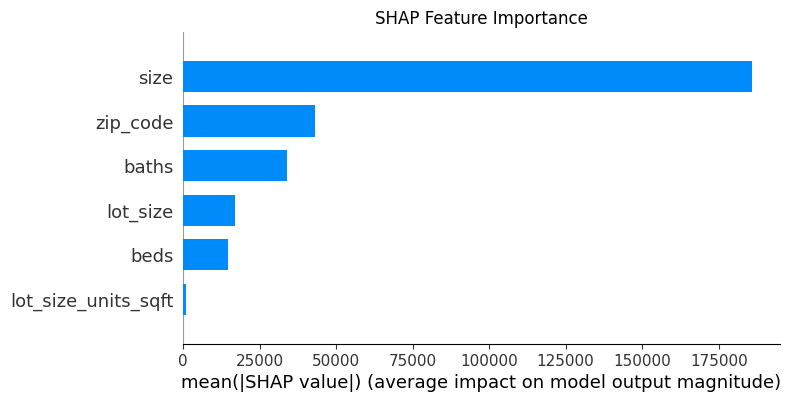

In [29]:
import shap

# Extract the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Create the explainer object
explainer = shap.Explainer(best_xgb_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.show()


In [24]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.6 MB/s eta 0:00:00
